In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_1.csv.gz',compression='gzip',lineterminator='\n');
data=data.sample(frac=1).reset_index(drop=True)

In [ ]:
y = data['class']
X = data.drop(['class'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X, y)

RandomForestClassifier(criterion='entropy')

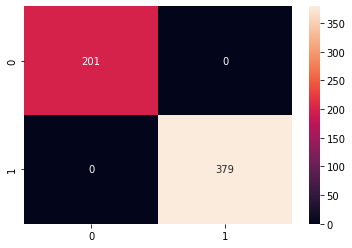

In [ ]:
y_predict_train = randomforest_classifier.predict(X)
cm = confusion_matrix(y, y_predict_train)
sns.heatmap(cm, annot=True,fmt="d")

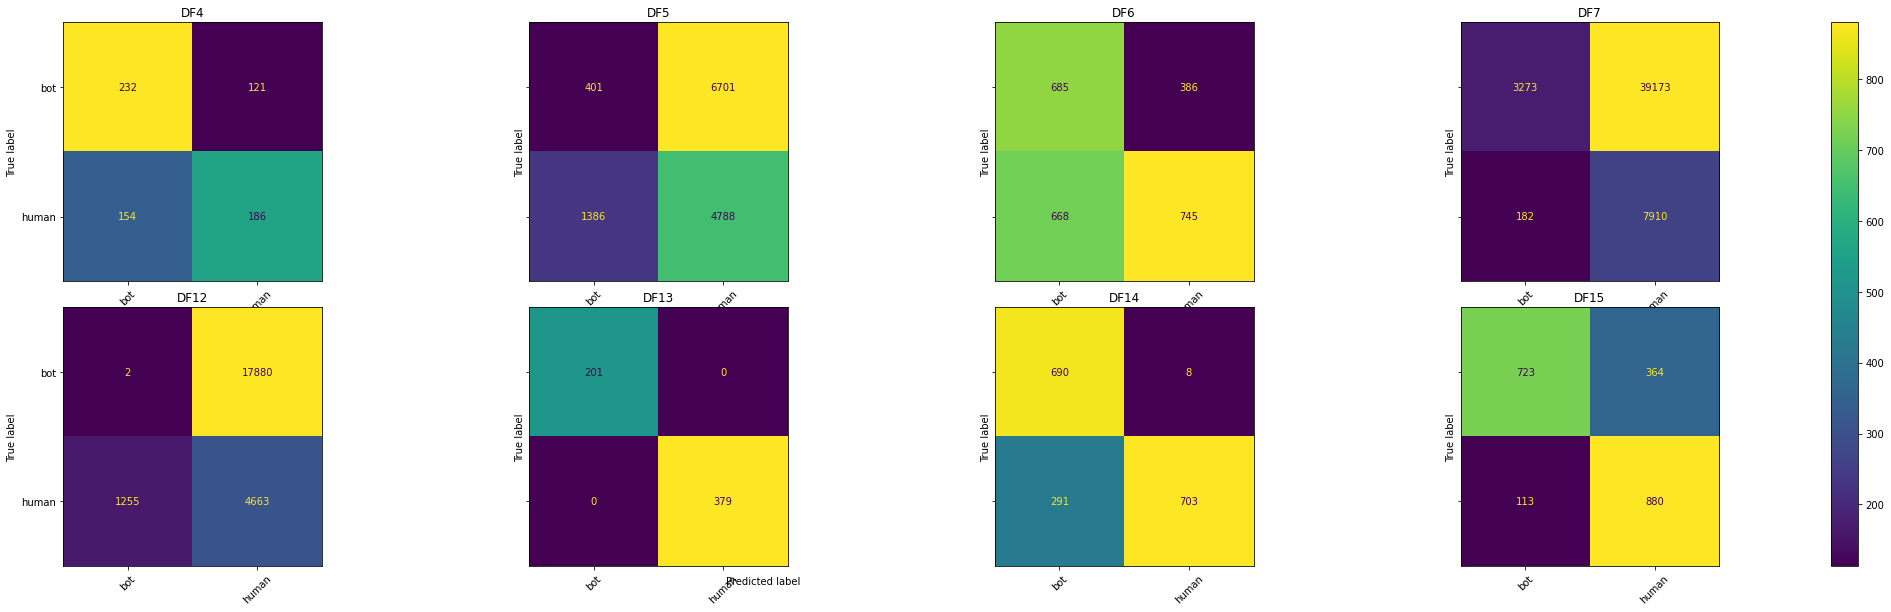

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.601036,0.657224,0.627876,353,0.605863,0.547059,0.574961,340,0.603175
1,DF5,0.224398,0.056463,0.090224,7102,0.416746,0.775510,0.542150,6174,0.390856
2,DF6,0.506282,0.639589,0.565182,1071,0.658709,0.527247,0.585692,1413,0.575684
3,DF7,0.947323,0.077110,0.142611,42446,0.168001,0.977509,0.286724,8092,0.221279
4,DF12,0.001591,0.000112,0.000209,17882,0.206849,0.787935,0.327676,5918,0.196008
5,DF13,1.000000,1.000000,1.000000,201,1.000000,1.000000,1.000000,379,1.000000
6,DF14,0.703364,0.988539,0.821918,698,0.988748,0.707243,0.824633,994,0.823286
7,DF15,0.864833,0.665133,0.751950,1087,0.707395,0.886203,0.786768,993,0.770673


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_test_predict = randomforest_classifier.predict(test.drop(['class'],axis=1))


  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], y_test_predict,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], y_test_predict)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)